**Данные**:
* `finderPatterns` -- размеченный [датасет](https://www.kaggle.com/datasets/samygrisard/finder-patterns-qr-code) с kaggle, 1602 изображений. Используется как train.
* `TestSet` -- данный нам [датасет](https://drive.google.com/drive/u/0/folders/1QuUqL0LwcRoWNvRODXwwX3yVIWAtySo5), [размеченный](https://drive.google.com/drive/u/1/folders/1cnc76pEhn_uUSCVlRm4dGdLtCQvWvq-q) вручную на [makesense.ai](makesense.ai), 95 изображений. Используется как val.

In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone
!cd yolov5 && pip install -r requirements.txt

  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached tensorboard-2.9.0-py3-none-any.whl (5.8 MB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl (4.9 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
     |████████████████████████████████| 1.0 MB 2.7 MB/s eta 0:00:01
  Using cached google_auth-2.6.6-py2.py3-none-any.whl (156 kB)
     |████████████████████████████████| 4.4 MB 721 kB/s eta 0:00:011
     |████████████████████████████████| 97 kB 2.2 MB/s eta 0:00:01
  Using cached Werkzeug-2.1.2-py3-none-any.whl (224 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)


In [16]:
%%writefile -a yolov5/data/qrfp.yaml
path: /home/pi/abbyy-cv/task6/data
train: finderPatterns
val: TestSet
test: #empty

nc: 1
names: 'Finder pattern'
    
download: # empty

Appending to yolov5/data/qrfp.yaml


In [21]:
!cd yolov5 && python3 train.py --img 640 --batch 64 --epochs 50 --data qrfp.yaml --weights yolov5n.pt --single-cls

train: weights=yolov5n.pt, cfg=, data=qrfp.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=True, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-186-g3356f26 Python-3.8.10 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0

      7/49     7.87G   0.03435   0.02057         0        13       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         95        291      0.526      0.533       0.33     0.0515

     Epoch   gpu_mem       box       obj       cls    labels  img_size
      8/49     7.87G   0.03055   0.01955         0        15       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         95        291      0.859      0.817      0.749      0.156

     Epoch   gpu_mem       box       obj       cls    labels  img_size
      9/49     7.87G   0.02938   0.02008         0        15       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         95        291      0.972      0.953      0.979      0.492

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     10/49     7.87G   0.02782   0.01


     Epoch   gpu_mem       box       obj       cls    labels  img_size
     33/49     7.87G   0.02141   0.01654         0         9       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         95        291      0.996      0.976      0.988      0.376

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     34/49     7.87G   0.02109   0.01687         0        17       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         95        291      0.998      0.983      0.994      0.381

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     35/49     7.87G   0.02089   0.01677         0        15       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         95        291      0.997       0.98      0.994      0.507

     Epoch   gpu_mem       box      

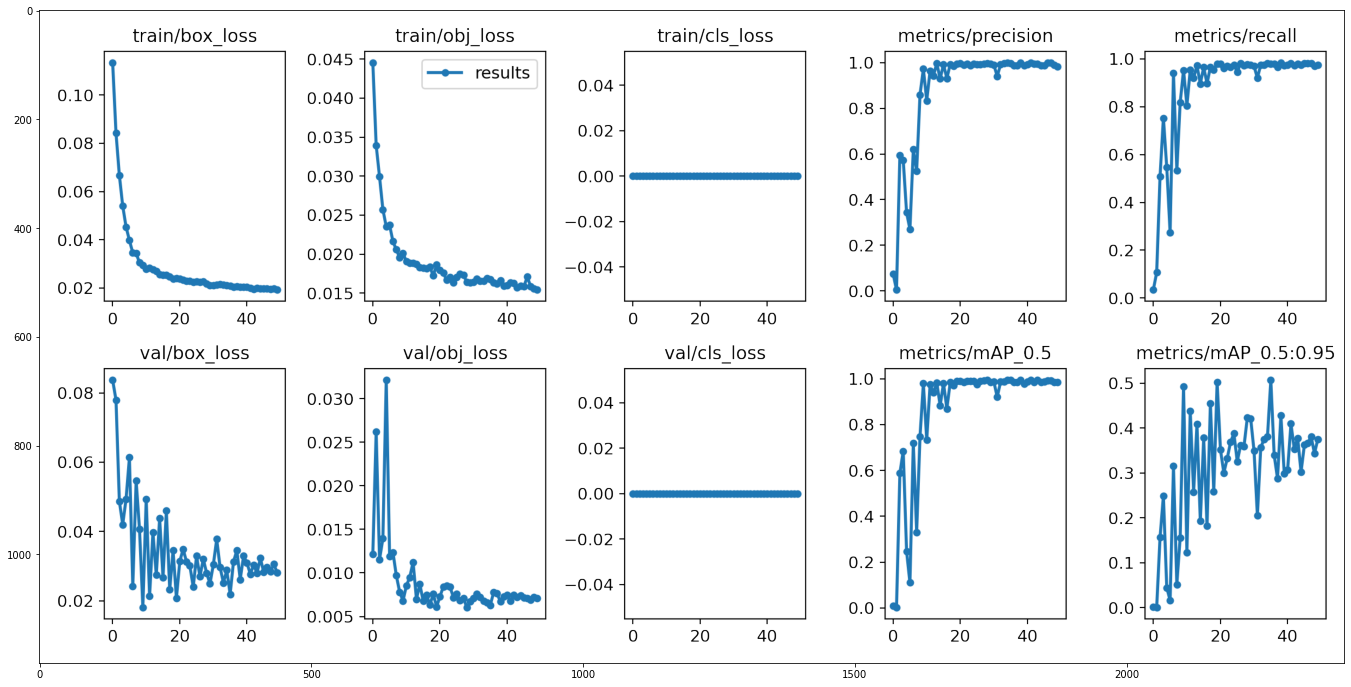

In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 12))
plt.imshow(plt.imread('./yolov5/runs/train/exp3/results.png'))
plt.show()

Получили метрики на TestSet: `Precision`: 0.997, `Recall`: 0.98, `mAP@.5`: 0.994, `mAP@`: 0.507

In [3]:
!cd yolov5 && python3 detect.py --source /home/pi/abbyy-cv/task6/data/TestSet/images --weights ./runs/train/exp3/weights/best.pt

detect: weights=['./runs/train/exp3/weights/best.pt'], source=/home/pi/abbyy-cv/task6/data/TestSet/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-186-g3356f26 Python-3.8.10 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)

Fusing layers... 
Model summary: 213 layers, 1760518 parameters, 0 gradients, 4.2 GFLOPs
image 1/95 /home/pi/abbyy-cv/task6/data/TestSet/images/TestSet1_0001.jpg: 640x384 4 items, Done. (0.007s)
image 2/95 /home/pi/abbyy-cv/task6/data/TestSet/images/TestSet1_0002.jpg: 640x384 3 items, Done. (0.005s)
image 3/95 /home/pi/abbyy-cv/task6/data/TestSet/images/TestSet1_0003.jpg: 640x384 3 items, Done. (0.005s)
i

image 72/95 /home/pi/abbyy-cv/task6/data/TestSet/images/TestSet2_0025.jpg: 384x640 6 items, Done. (0.005s)
image 73/95 /home/pi/abbyy-cv/task6/data/TestSet/images/TestSet2_0026.jpg: 384x640 5 items, Done. (0.005s)
image 74/95 /home/pi/abbyy-cv/task6/data/TestSet/images/TestSet2_0027.jpg: 384x640 8 items, Done. (0.005s)
image 75/95 /home/pi/abbyy-cv/task6/data/TestSet/images/TestSet2_0028.jpg: 384x640 3 items, Done. (0.005s)
image 76/95 /home/pi/abbyy-cv/task6/data/TestSet/images/TestSet2_0029.jpg: 384x640 7 items, Done. (0.005s)
image 77/95 /home/pi/abbyy-cv/task6/data/TestSet/images/TestSet2_0030.jpg: 384x640 3 items, Done. (0.005s)
image 78/95 /home/pi/abbyy-cv/task6/data/TestSet/images/TestSet2_0031.jpg: 384x640 3 items, Done. (0.005s)
image 79/95 /home/pi/abbyy-cv/task6/data/TestSet/images/TestSet2_0032.jpg: 640x384 3 items, Done. (0.005s)
image 80/95 /home/pi/abbyy-cv/task6/data/TestSet/images/TestSet2_0033.jpg: 640x384 3 items, Done. (0.005s)
image 81/95 /home/pi/abbyy-cv/task6/d

In [24]:
import cv2
import numpy as np
import os
os.makedirs('./TestSet_results', exist_ok=True)

for fname in os.listdir('./data/TestSet/images'):
    img_true = cv2.imread(f'./data/TestSet/images/{fname}')
    img_predict = cv2.imread(f'./yolov5/runs/detect/exp2/{fname}')
    with open(f'./data/TestSet/labels/{fname[:-4]}.txt') as f:
        labels = f.readlines()
        bbox_true = [list(map(float, label.split()[1:])) for label in labels] # x, y, width, height
        bbox_true = [
            (
                int(img_true.shape[1] * (x - w / 2)),
                int(img_true.shape[0] * (y - h / 2)),
                int(img_true.shape[1] * (x + w / 2)),
                int(img_true.shape[0] * (y + h / 2))
            )
            for x, y, w, h in bbox_true
        ]
        
    for bbox in bbox_true:
        cv2.rectangle(img_predict, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)
    cv2.imwrite(f'./TestSet_results/{fname}', img_predict)

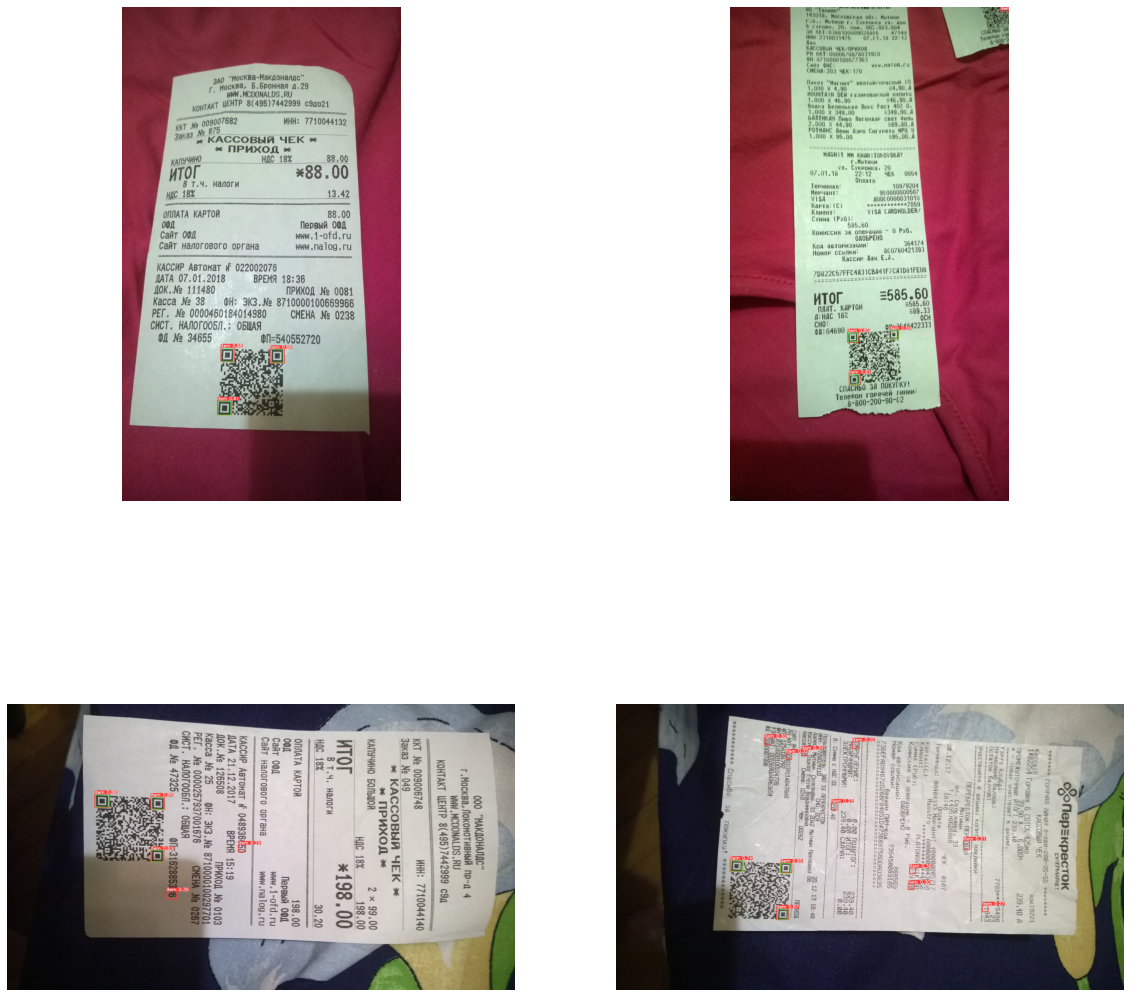

In [28]:
to_cmp = ['TestSet1_0019.jpg', 'TestSet1_0027.jpg', 'TestSet2_0016.jpg', 'TestSet2_0017.jpg']

plt.figure(figsize=(20, 20))
for i, img in enumerate(to_cmp):
    plt.subplot(2, 2, i + 1)
    img = plt.imread(f'./TestSet_results/{img}')
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

**Вывод**: модель быстро работает (5 мс на RTX 3090) и хорошо почти всегда детектирует сами finder pattern'ы, но в некоторых случаях у нее происходят ложные срабатывания (иногда в очень больших количествах как на последнем примере)